In [2]:
import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np

%matplotlib

Using matplotlib backend: MacOSX


In [3]:
path = '/Users/francobenko/Downloads/Photos/foto_fran.jpg'

img = cv.imread(path)

In [4]:
print(img)

[[[ 20  18  17]
  [ 16  14  13]
  [ 13  11  10]
  ...
  [115  80 106]
  [117  82 109]
  [120  85 112]]

 [[ 20  18  17]
  [ 18  16  15]
  [ 16  14  13]
  ...
  [114  79 105]
  [116  81 108]
  [119  84 111]]

 [[ 17  15  14]
  [ 17  15  14]
  [ 18  16  15]
  ...
  [117  82 108]
  [119  84 111]
  [121  86 113]]

 ...

 [[ 23  15  15]
  [ 22  14  14]
  [ 22  14  14]
  ...
  [  6   6   6]
  [  6   6   6]
  [  7   7   7]]

 [[ 24  16  16]
  [ 21  13  13]
  [ 22  14  14]
  ...
  [  6   6   6]
  [  7   7   7]
  [  8   8   8]]

 [[ 24  16  16]
  [ 21  13  13]
  [ 21  13  13]
  ...
  [  6   6   6]
  [  7   7   7]
  [  8   8   8]]]


In [5]:
# ACORDATE QUE OPENCV TIENE LA GAMA DE COLORES BGR
plt.imshow(img)
plt.show()

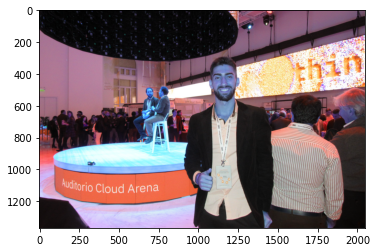

In [9]:
plt.imshow(img)
plt.show()

In [6]:
# CAMBIAR SECUENCIA BGR A RGB (NORMAL)

imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.show()

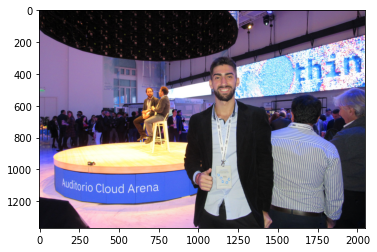

In [15]:
imgRGB2 = img[...,::-1]

plt.imshow(imgRGB2)
plt.show()

In [7]:
# Quiero desensamblar los canales para trabajarlos por separado

im_r,im_g,im_b = cv.split(imgRGB)
print(im_r)
print('Canal rojo')
plt.imshow(im_r)
plt.show()
print('Canal verde')
plt.imshow(im_g)
plt.show()
print('Canal azul')
plt.imshow(im_b)
plt.show()

[[ 17  13  10 ... 106 109 112]
 [ 17  15  13 ... 105 108 111]
 [ 14  14  15 ... 108 111 113]
 ...
 [ 15  14  14 ...   6   6   7]
 [ 16  13  14 ...   6   7   8]
 [ 16  13  13 ...   6   7   8]]
Canal rojo
Canal verde
Canal azul


In [8]:
imgRGB2 = cv.merge((im_r*0,im_g*0,im_b))

plt.imshow(imgRGB2)
plt.show()


# Ejercicio de arandelas

In [9]:
path = '/Users/francobenko/Downloads/Photos/arandelas.png'

img = cv.imread(path)
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [10]:
plt.figure(1)
plt.imshow(imgRGB)
plt.show()

In [11]:
## Arandela Naranja

In [12]:
img_muestra = imgRGB[440:447,280:300,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

In [13]:
color_mean, color_std = cv.meanStdDev(img_muestra)

print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[176.67857142857142, 99.32857142857142, 33.714285714285715]
[1.8832641008287705, 1.6794678457473267, 1.8642720306010874]


In [14]:
mask = cv.inRange(imgRGB, color_mean-color_std*20,  color_mean+color_std*20)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

## Arandela Azul

In [15]:
img_muestra = imgRGB[430:440,153:173,:]
plt.figure(4)
plt.imshow(img_muestra)
plt.show()

In [16]:
color_mean, color_std = cv.meanStdDev(img_muestra)

print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[30.765, 43.075, 153.47]
[2.666416134064601, 3.3525177106168513, 2.8051916155585324]


In [17]:
mask = cv.inRange(imgRGB, color_mean-color_std*15,  color_mean+color_std*15)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(5)
plt.imshow(img_segmentada)
plt.show()

## Arandelas rojas

In [18]:
img_muestra = imgRGB[295:300,328:340,:]
plt.figure(6)
plt.imshow(img_muestra)
plt.show()

In [19]:
color_mean, color_std = cv.meanStdDev(img_muestra)

print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[154.83333333333334, 66.41666666666667, 75.9]
[7.49036418043569, 8.301188000655191, 8.823642482935584]


In [20]:
mask = cv.inRange(imgRGB, color_mean-color_std*2,  color_mean+color_std*2)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(7)
plt.imshow(img_segmentada)
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv.split(imgRGB)
#r, g, b = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

In [22]:
img_HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.figure(7)
plt.imshow(img_HSV)

In [23]:
#r, g, b = cv.split(imgRGB)
r, g, b = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()